1. Predict price of Mercedez Benz that is 4 years old with mileage 45000.
2. Predict price of BMW X5 that is 7 years old with mileage 86000.
3. What is the score(accuracy) of your model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
cars = pd.read_csv('/Users/hackthebox/Downloads/Machine-Learning-Self-Study/ONE_HOT_ENCODING/Data/carprices.csv')

In [4]:
cars.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [6]:
cars['Car Model'].value_counts()

Car Model
BMW X5                   5
Audi A5                  4
Mercedez Benz C class    4
Name: count, dtype: int64

<Axes: xlabel='Mileage', ylabel='Sell Price($)'>

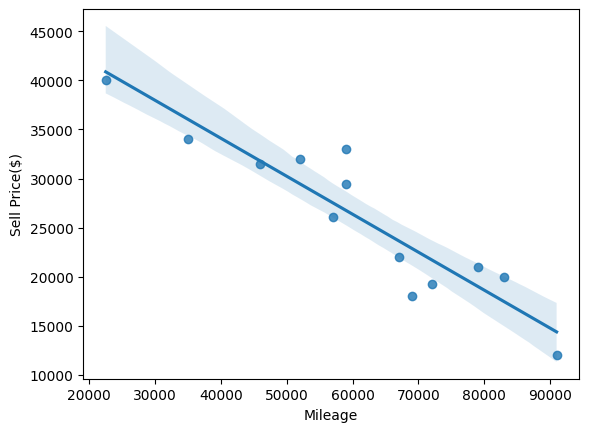

In [10]:
sns.regplot(data=cars,x='Mileage',y='Sell Price($)')

<Axes: xlabel='Age(yrs)', ylabel='Sell Price($)'>

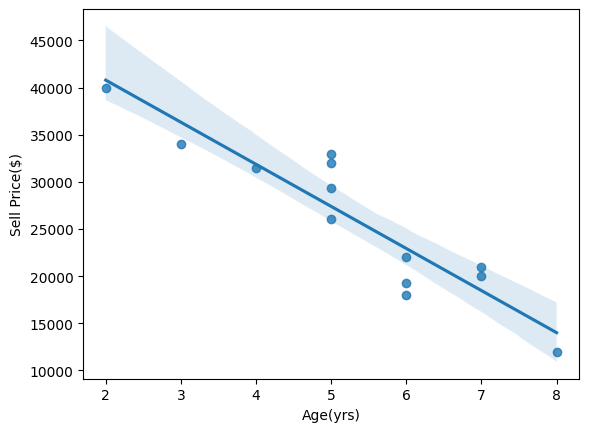

In [11]:
sns.regplot(data=cars,x='Age(yrs)',y='Sell Price($)')

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
cars['Car Model']= le.fit_transform(cars['Car Model'])
cars['Car Model']

0     1
1     1
2     1
3     1
4     1
5     0
6     0
7     0
8     0
9     2
10    2
11    2
12    2
Name: Car Model, dtype: int64

In [14]:
x = cars[['Car Model','Mileage','Age(yrs)']]
x

,Car Model,Mileage,Age(yrs)
0,1,69000,6
1,1,35000,3
2,1,57000,5
3,1,22500,2
4,1,46000,4
5,0,59000,5
6,0,52000,5
7,0,72000,6
8,0,91000,8
9,2,67000,6


In [16]:
y = cars['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [17]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')

In [19]:
x1 = ohe.fit_transform(cars[['Car Model']])
x1 = pd.DataFrame(x1.toarray())

In [20]:
x1 = x1.iloc[:,1:]
x1

,1,2
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,1.0


In [21]:
x = pd.concat([x,x1],axis='columns')
x

,Car Model,Mileage,Age(yrs),1,2
0,1,69000,6,1.0,0.0
1,1,35000,3,1.0,0.0
2,1,57000,5,1.0,0.0
3,1,22500,2,1.0,0.0
4,1,46000,4,1.0,0.0
5,0,59000,5,0.0,0.0
6,0,52000,5,0.0,0.0
7,0,72000,6,0.0,0.0
8,0,91000,8,0.0,0.0
9,2,67000,6,0.0,1.0


In [22]:
x.drop('Car Model',axis='columns',inplace=True)
x

,Mileage,Age(yrs),1,2
0,69000,6,1.0,0.0
1,35000,3,1.0,0.0
2,57000,5,1.0,0.0
3,22500,2,1.0,0.0
4,46000,4,1.0,0.0
5,59000,5,0.0,0.0
6,52000,5,0.0,0.0
7,72000,6,0.0,0.0
8,91000,8,0.0,0.0
9,67000,6,0.0,1.0


In [23]:
from sklearn.linear_model import LinearRegression

In [25]:
x = x.values

In [26]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [27]:
model.predict([[45000,4,0,1]])

array([36991.31721061])

In [28]:
model.predict([[86000,7,1,0]])

array([11080.74313219])

In [29]:
model.score(x,y)

0.9417050937281083

<Axes: xlabel='Mileage', ylabel='Sell Price($)'>

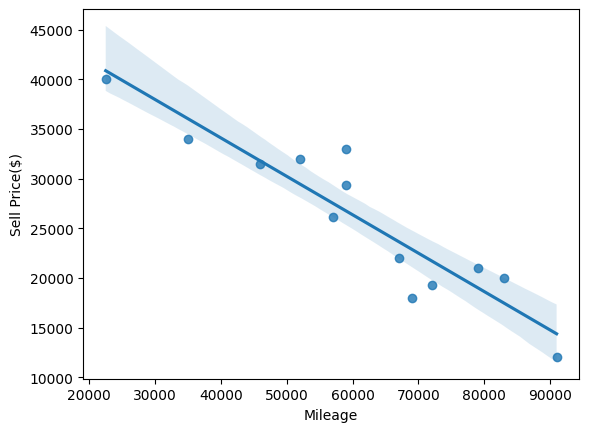

In [30]:
sns.regplot(data=cars,x='Mileage',y='Sell Price($)')

<Axes: xlabel='Age(yrs)', ylabel='Sell Price($)'>

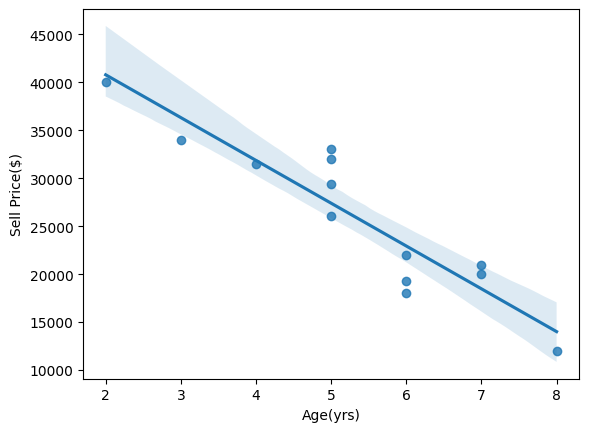

In [31]:
sns.regplot(data=cars,x='Age(yrs)',y='Sell Price($)')